# Lecture 7: Simple Models for Chaos and the logistic map

**Overview:**
* Revisit phase space plot and Poincare Map.
* Properties of the Logistic Map.


---

In [1]:
#%matplotlib notebook  
import matplotlib.pyplot as plt # for plotting          
import numpy as np
# import our Pendulum class from Particle1D
from Particle1D_2 import Pendulum
import LogisticMap as lm


## Exercise
* Open the file `LogisticMap.py` in a text editor and examine the contents, make sure that you understand all of the components.

## The Logistic Map

* Run the code below and change the $\mu$ values to try to find stable fixed points of period 1T, 2T, 4T, and higher by adjusting the parameters $\mu$ and $x_0$.

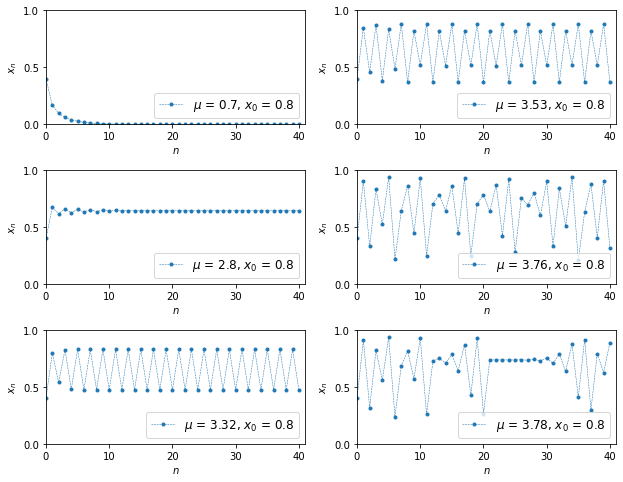

In [2]:
fig = plt.figure(figsize = [9,7])
axs = fig.subplots(3,2)
    
axs = list(axs.flatten())
mus = [0.7,3.53,2.8,3.76,3.32,3.78] 

max_steps = 40

for ii in range(6):

    m = lm.LogisticMap(0.4, mu = mus[ii])
    m.iterate(max_steps)

    axs[ii].plot(m.xList, ls = '--', marker = 'o', ms = 3, lw =0.5, label = "$\mu$ = {0}, $x_0$ = {1}".format(mus[ii], 0.8))
    axs[ii].set_ylabel('$x_n$')
    axs[ii].set_xlabel('$n$')
    axs[ii].legend(loc = 4,fontsize = 12)
    axs[ii].set_ylim([0,1])
    axs[ii].set_xlim([0,max_steps+1])
    axs[ii].set_yticks([0,0.5,1])
        
    
    fig.subplots_adjust(top = 0.95, bottom =0.09, left = 0.10, right =0.98, wspace = 0.2, hspace = 0.4)



## Period doubling and the logistic map

* Can you modify the code below to generate a bifrucation diagram? Hint:  If you simply plot all points in a given time trace there will be too much data and a significant strain on memory.  Almost all of that data is redundant! To get rid of redundancies, look up the helpfile on the function `np.unique`.
* Try modifying the range of $\mu$ to create a higher point density in an interesting region and zoom in. How far can you zoom in?

Text(0, 0.5, '$x_n$')

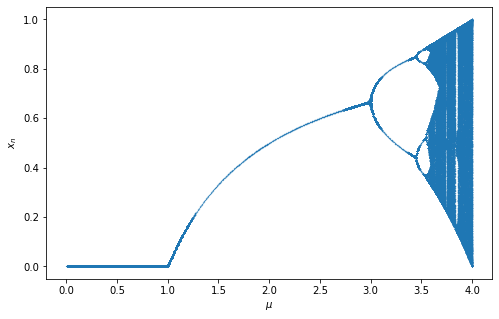

In [12]:
# Generate a bifrucation diagram
mu_start = 0
mu_stop = 4
mu_steps = 1000

x0 = 0.8 

# Generate an array of mu values
mus = np.linspace(mu_start, mu_stop, mu_steps)
  
# containers for mu values and logistic map values
mu_list = []
m_list = []
    
# loop over the mu values
for mu in mus:
    
    # generate a time trace for the logistic map at a given mu
    m = lm.LogisticMap(x0, mu = mu)
    
    # initialize method removes transient
    m.initialize(100)
    m.iterate(1000)
        
    # convert list to numpy array object
    m_points = np.array(m.xList)
    
    #!!!!!ADD YOUR CODE HERE to select key points from time trace here 
    m_points_unique = np.unique(m_points)
    for m in m_points_unique:
        mu_list.append(mu)
        m_list.append(m)

fig = plt.figure(figsize = [8,5])
ax = fig.add_subplot(111)
ax.plot(mu_list, m_list,'.', markersize = 0.5)
ax.set_xlabel('$\mu$')
ax.set_ylabel('$x_n$')


## Period doubling route to chaos and the Pendulum
* Explore the period doubling route to chaos in the non-linear damped driven pendulum using the code below. Try to follow the periodicity of the solution as the period successively increases.  You can explore the same phenomena for the logistic map by adjusting parameters for the plots above in the cell above this one.

In [ ]:
 # demonstate regime of chaotic behavior
fig = plt.figure(figsize = [8,6])
axs = fig.subplots(3,1)
    
Fds = [1.4,1.45,1.465] 

for ii in range(3):
    p = Pendulum(nu = 1/2, Fd = Fds[ii], omega_d = 2./3. , x0 = 0.200, v0 = 0, tf = 420)
    p.scipy_trajectory()

    axs[ii].plot(p.tarray, p.xv[:,0],lw = 2, label = "$F_d$ = {}".format(Fds[ii]))
    axs[ii].set_ylabel('$\\theta$ (rad)')
    axs[ii].legend(loc = 4, fontsize = 12)
    axs[ii].set_xlim([300,420])
        

    axs[-1].set_xlabel('t (s)')
    
fig.subplots_adjust(top = 0.98, bottom =0.08, left = 0.14, right =0.98)



## Exercise:
* Construct Poincare Maps for each of the above traces as you approach a chaotic solution. How many points should appear in each Poincare map for each solution with a given period n$\Omega_d$?

## Sensitivity to Initial Conditions

In [ ]:
fig = plt.figure(figsize = [9,6])
axs = fig.subplots(2,2)
axs = axs.flatten()

delta = 1e-10

m1 = lm.LogisticMap(0.8, mu = 3.2)
m1.iterate(80)
m2 = lm.LogisticMap(0.8+delta, mu = 3.2)
m2.iterate(80)
diff1 = np.abs(np.array(m1.xList) - np.array(m2.xList))

axs[0].plot(m1.xList, ls = '--', lw = 0.5, marker = 'o', ms = 2, label = "$x_0$ = 0.8")
axs[0].plot(m2.xList, ls = '--', marker = 's', ms = 2, label = "$x_0$ = 0.8 + 1e-10")
axs[2].semilogy(diff1, ls = '--', marker = 'o', ms = 2, label = "$\mu$ = 3.2")
    
m3 = lm.LogisticMap(0.8, mu = 3.8)
m3.iterate(80)    
m4 = lm.LogisticMap(0.8+delta, mu = 3.8)
m4.iterate(80)
diff2 = np.abs(np.array(m4.xList) - np.array(m3.xList))

axs[1].plot(m4.xList, ls = '--', lw = 0.5,  marker = 'o', ms = 2, label = "$x_0$ = 0.8")
axs[1].plot(m3.xList, ls = '--', marker = 'o', ms = 2, label = "$x_0$ = 0.8 + 1e-10")
axs[3].semilogy(diff2, ls = '--', marker = 'o', ms = 2, label = "$\mu$ = 3.8")

axs[0].set_ylabel('$x_n$')
axs[2].set_ylabel('$\Delta x_n$')
for ax in axs:
    ax.set_xlabel('$n$')
    

axs[0].set_title("$\mu = 3.2$")
axs[1].set_title("$\mu = 3.8$")
axs[0].legend(loc = 3,fontsize = 10, markerscale = 0.5)
axs[1].legend(loc = 3,fontsize = 10, markerscale = 0.5)
fig.subplots_adjust(top = 0.95, bottom =0.09, left = 0.12, right =0.98, wspace = 0.2, hspace = 0.3)

## Lyapunov Exponent for the logistic map

In [ ]:
x0 = 0.4
mu_start = 1
mu_stop = 4
mu_steps = 1000
mus = np.linspace(mu_start, mu_stop, mu_steps)
 
lyapunov_list = [] 
for mu in mus:
    m = lm.LogisticMap(x0, mu = mu)
    l = m.lyapunov(1000, 200)
    lyapunov_list.append(l)

fig = plt.figure(figsize = [8,6])
ax = fig.add_subplot(111)
ax.plot(mus, lyapunov_list,'.', markersize = 1)
ax.hlines(0,0,4, lineStyles = '--', lw = 1,colors = 'k')
#ax.set_ylim([-2,1])
ax.set_xlim([mu_start, mu_stop])
ax.set_xlabel('$\mu$')
ax.set_ylabel('$\lambda$')


## Exercise
* Explore the Lyapunov exponent for different values of $\mu$ and $x_0$. What happens to the trajectories right at the cusps of the Lyapunov exponent, for example at $\mu=2$? What about when $\lambda=0$?
* Can you numerically compute the Lyapunov exponent for a given $\mu$ and compare with the exact result?